<a href="https://colab.research.google.com/github/Shanu-Mathew/Tensorflow-Notes/blob/main/Neural_Network_Regression_(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we are going to somplify it: Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

### Importing Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.12.0


##Data Ingestion

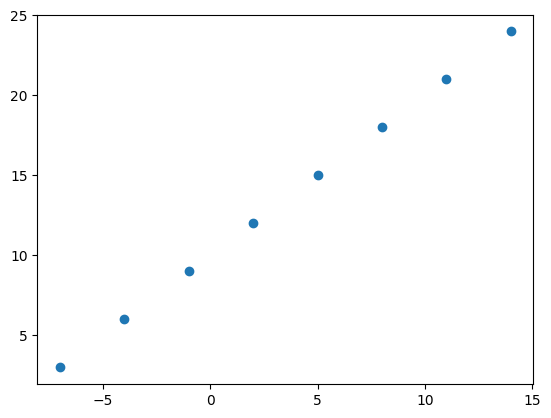

In [ ]:
#Create Features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualisation
plt.scatter(X,y);

In [ ]:
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
#Create a demo tensor
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([937000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Numpy array into tensors with dtype float32
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with Tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and the evaluation metrics (which we can use to interpret the performance of our model)
3. Fitting a model -  Letting the model try to find patterns between X & y (features and Labels)

In [ ]:
from keras.engine.training import optimizer
# Set Random Seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5);

Epoch 1/5
1/1 [==============================] - 0s 423ms/step - loss: 12.1080 - mae: 12.1080
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.9755 - mae: 11.9755
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.8430 - mae: 11.8430
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.7105 - mae: 11.7105
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 11.5780 - mae: 11.5780


In [ ]:
# Making prediction
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 76ms/step


array([[29.825813]], dtype=float32)

## Improving  our Model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** -
    * We might add more layers,
    * Increase the number of hidden units (all called neurons) within each of the hidden layers
    * Change the activation function of each layer.
2. **Compiling a model** -
    * Change the optimization function or **learning rate** of the optimization function
3. **Fitting a model** -
    * Fit a model for more epochs
    * Fit a model with more data (& give the model more examples to learn from)


In [ ]:
#Improve the model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) #Epochs means how many times the model refines on the training data

Epoch 1/100
1/1 [==============================] - 1s 666ms/step - loss: 12.6961 - mae: 12.6961
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5636 - mae: 12.5636
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.4311 - mae: 12.4311
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2986 - mae: 12.2986
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1661 - mae: 12.1661
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0336 - mae: 12.0336
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9011 - mae: 11.9011
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7686 - mae: 11.7686
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6361 - mae: 11.6361
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5036 - mae: 11.5036
Epoch 11/100
1/1 [==============================

In [ ]:
#Prediction of values by new model
model.predict([17.0])

1/1 [==============================] - 0s 105ms/step


array([[29.749546]], dtype=float32)

In [ ]:
#Improving Model more

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])
#2. Compiling the model
model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 587ms/step - loss: 13.7673 - mae: 13.7673
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.6985 - mae: 13.6985
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6297 - mae: 13.6297
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5608 - mae: 13.5608
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4921 - mae: 13.4921
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4233 - mae: 13.4233
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3545 - mae: 13.3545
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2858 - mae: 13.2858
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2171 - mae: 13.2171
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1484 - mae: 13.1484
Epoch 11/100
1/1 [==============================]

In [ ]:
#Predicting the values
model.predict([27.0])

1/1 [==============================] - 0s 72ms/step


array([[28.429766]], dtype=float32)

In [ ]:
#Improving Model more

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2. Compiling the model
model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 612ms/step - loss: 13.4403 - mae: 13.4403
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6989 - mae: 12.6989
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9614 - mae: 11.9614
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2262 - mae: 11.2262
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4919 - mae: 10.4919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7559 - mae: 9.7559
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0156 - mae: 9.0156
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2682 - mae: 8.2682
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5105 - mae: 7.5105
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7694 - mae: 6.7694
Epoch 11/100
1/1 [==============================] - 0s 10m

In [ ]:
#Predicting the values
model.predict([27.0])

1/1 [==============================] - 0s 102ms/step


array([[38.17404]], dtype=float32)

## Evaluating a Model
In practice, a typical workflow, you'll go through when building a neural network is:

```
Build a model -> Fit the Model -> Evaluate the model -> Tweak the model -> Fit the model -> Evaluate the model
```

When we are evaluating the models, We should always visualise.

It is good to visualize:-
* The data
* The model itself
* The training of a model
* The predictions of a model


In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

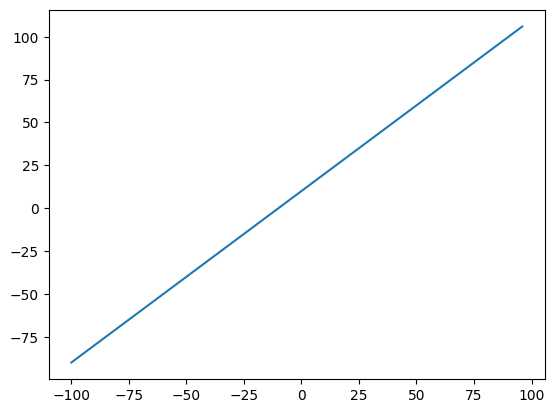

In [ ]:
#Visualise the data
plt.plot(X,y)

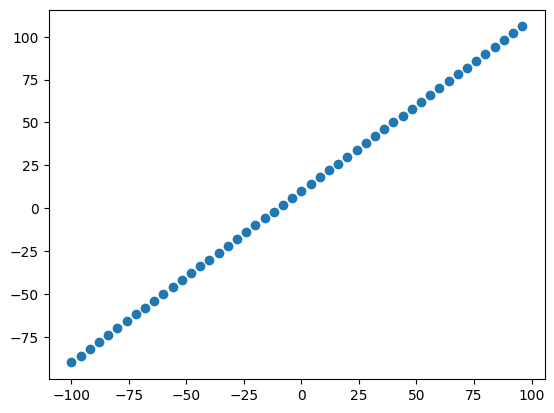

In [ ]:
plt.scatter(X,y)

### The 3 sets....
* **Training Set** - The model learns from this data , typically 7-80% of the total data.
* **Validation Set** - The models gets tunes on this data, which is typically 10-15% of the data available
* **Test Set** - The model gets evaluated on this data, which is typically 10-15% of the data available.



In [ ]:
len(X)

50

In [ ]:
#Train Test Split
X_train=X[:40] #first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] #last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising Training and Testing Data

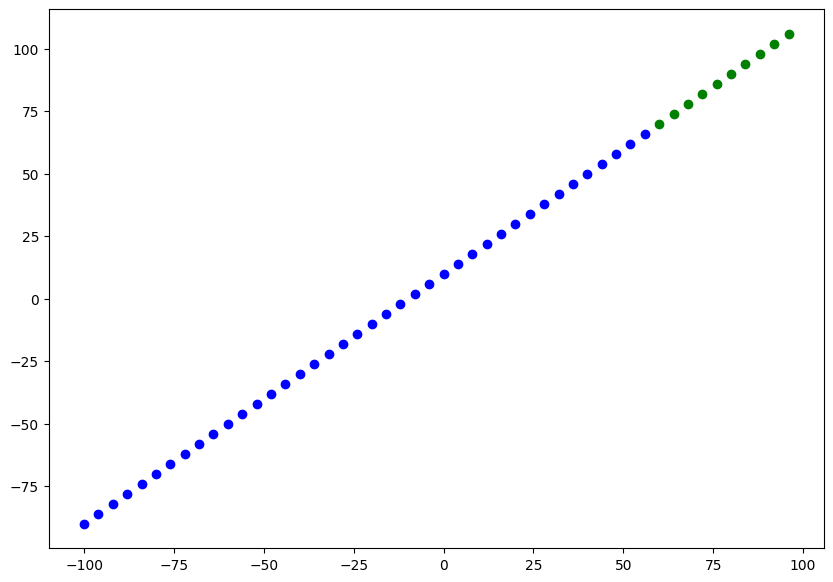

In [ ]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training Data")

# Plot the testing data in green
plt.scatter(X_test,y_test,c="g",label="Test Data")

### Building Neural Network for the new Data

In [ ]:
#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

### Visualising the new Neural Network Model


In [ ]:
model.summary()

ValueError: ignored

In [ ]:
tf.random.set_seed(42)

#1. Creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable Parameteres - These are the parameters (patterns) the model can update as it trains.
* Non-trainable params - These parameters aren't updated during training ( this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**


**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.


In [ ]:
# Fitting the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 18ms/step - loss: 41.2007 - mae: 41.2007
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 40.8528 - mae: 40.8528
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 40.4826 - mae: 40.4826
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 40.1284 - mae: 40.1284
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 39.7713 - mae: 39.7713
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 39.4340 - mae: 39.4340
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 39.0996 - mae: 39.0996
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 38.7398 - mae: 38.7398
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.3325 - mae: 38.3325
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 37.9661 - mae: 37.9661
Epoch 11/100
2/2 [==============================] - 0s 

In [ ]:
#Get a summary of our model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


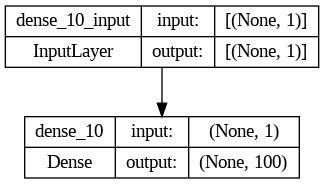

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
#Creating another with output layer specified
tf.random.set_seed(42)

#1. Creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=[1]),
    tf.keras.layers.Dense(1,name="output_layer")
],name="ModelTry1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "ModelTry1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               1000      
                                                                 
 output_layer (Dense)        (None, 1)                 501       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


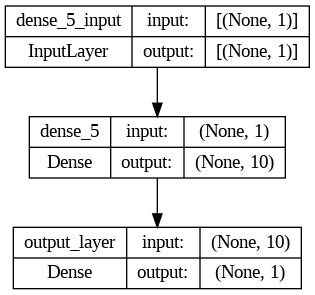

In [ ]:
plot_model(model,show_shapes=True)

### Visualising our Model's Prediction

In [ ]:
#Making prediction
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[ 75.97853 ],
       [ 80.92699 ],
       [ 85.87544 ],
       [ 90.82388 ],
       [ 95.77234 ],
       [100.72081 ],
       [105.66926 ],
       [110.61771 ],
       [115.566154],
       [120.5146  ]], dtype=float32)

In [ ]:
#Plotting Function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_label,c="g",label="Testing data")

  #Plot model's prediction in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #Showing the legend
  plt.legend();


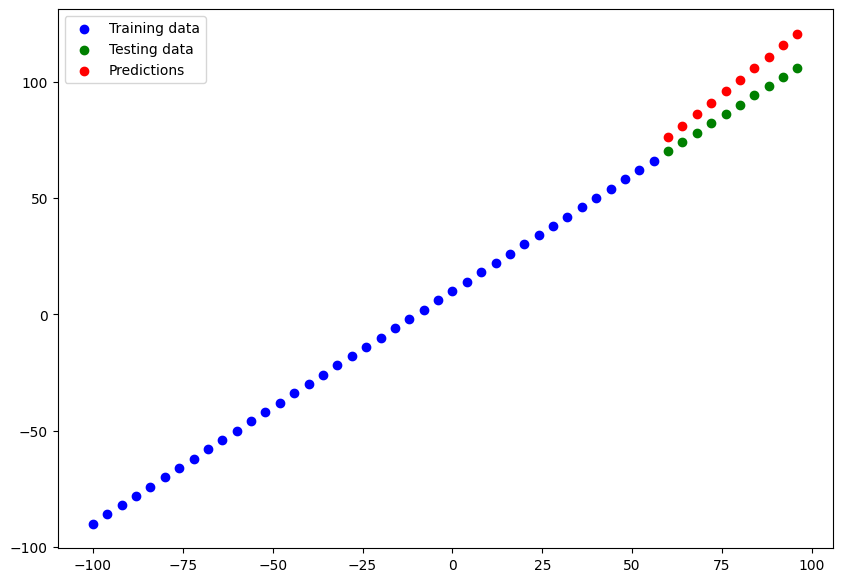

In [ ]:
plot_predictions()

### Evaluating Model Prediction using Regression Metrics

Some of the main metrics that we will use for evaluating our model are:
* MAE = Mean Absolute Error
* MSE = Mean Square Error
* Huber = Combination of MAE and MSE, Less sensitive to outliers than MSE

**Note:- You need to have Y_pred as a tensor and with the same shape as Y_test so that you can compare them properly**

In [ ]:
#Evaluate the model on the test data
model.evaluate(X_test,y_test)
#[loss,mae] as defined in the model compilation

1/1 [==============================] - 0s 367ms/step - loss: 10.2466 - mae: 10.2466


[10.246575355529785, 10.246575355529785]

In [ ]:
# Calculate Mean Absolute Error
mae=tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred,shape=(10,)))
mae

In [ ]:
#Calculate the mean squared error
mse=tf.metrics.mean_squared_error(y_test,tf.constant(y_pred,shape=(10,)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=112.41362>

In [ ]:
#Function to return MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred,shape=(10,)))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.constant(y_pred,shape=(10,)))

### Running experiments to improve our model

1. Get more data- get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - This might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Trying different models:-
1. `model 1` - same as the original model, 1 layer, trained for 100 epochs
2. `model 2` - 2 layers, trained for 100 epochs
3. `model 3` - 2 layers, trained for 500 epochs

**Model 1**

In [ ]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fitting the model
model_1.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 97ms/step


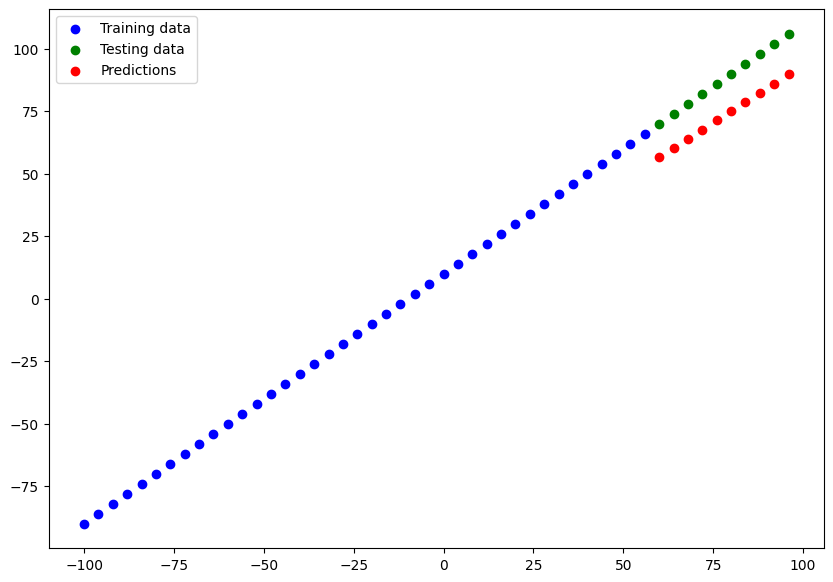

In [ ]:
#Plotting Predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [ ]:
#Model 1 Calculation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.835065>,
 <tf.Tensor: shape=(), dtype=float32, numpy=220.89775>)

**Model 2**

In [ ]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae","mse"])
#3. Fitting the model
model_2.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 97ms/step


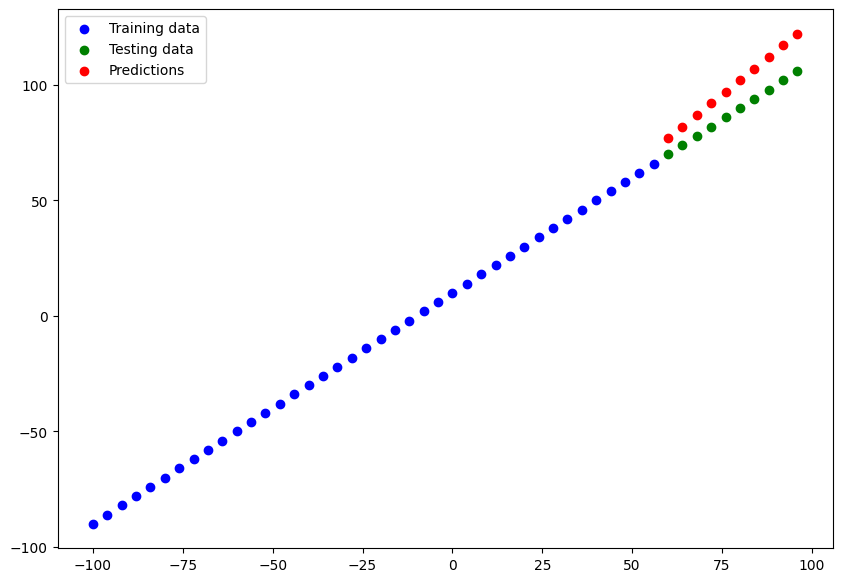

In [ ]:
#Plotting Predictions for model_1
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [ ]:
#Model 2 Calculation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.5917015>,
 <tf.Tensor: shape=(), dtype=float32, numpy=142.95853>)

**Model 3**

In [ ]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae","mse"])
#3. Fitting the model
model_3.fit(X_train,y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 66ms/step


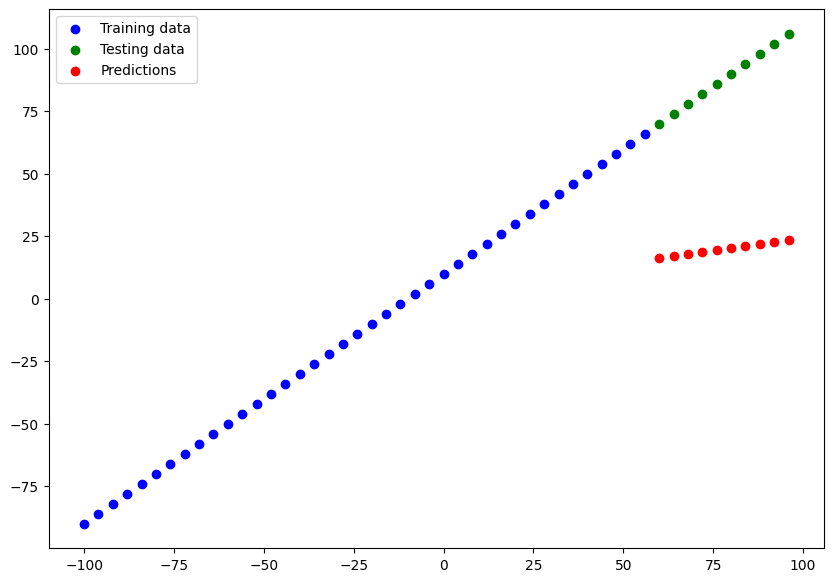

In [ ]:
#Plotting Predictions for model_1
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [ ]:
#Model 2 Calculation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4700.737>)